In [791]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
 

warnings.filterwarnings('ignore')

# flight delays
df = pd.read_csv('data/Train.csv')
df.head(5)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [792]:
airports = pd.read_csv('data/airports.csv')
airports.head()

,icao,iata,name,city,subd,country,elevation,lat,lon,tz,lid
0,00AA,NaN,Aero B Ranch Airport,Leoti,Kansas,US,3435.0,38.704022,-101.473911,America/Chicago,00AA
1,00AK,NaN,Lowell Field,Anchor Point,Alaska,US,252.0,59.948889,-151.692222,America/Anchorage,00AK
2,00AL,NaN,Epps Airpark,Harvest,Alabama,US,820.0,34.864810,-86.770278,America/Chicago,00AL
3,00AN,NaN,Katmai Lodge Airport,King Salmon,Alaska,US,80.0,59.093472,-156.455833,America/Anchorage,00AN
4,00AR,NaN,Arland Airport,Bennington,Kansas,US,1352.0,38.969651,-97.601557,America/Chicago,00AR


In [793]:
df['DATOP'].unique()

array(['2016-01-03', '2016-01-13', '2016-01-16', ..., '2018-12-28',
       '2018-12-29', '2018-12-30'], dtype=object)

#### Flight dates from 2016-01-03 until 2018-12-30

DATOP - Date of flight

FLTID - Flight number

DEPSTN - Departure airport

ARRSTN - Arrival airport

STD - Scheduled Time departure

STA - Scheduled Time arrival

STATUS - Flight status

AC - Aircraft Code

TARGET - Flight delay in minutes



In [794]:
df.count()


ID        107833
DATOP     107833
FLTID     107833
DEPSTN    107833
ARRSTN    107833
STD       107833
STA       107833
STATUS    107833
AC        107833
target    107833
dtype: int64

In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [796]:
# Change date columns to datetime Dtype

df['STD'] =  pd.to_datetime(df['STD'], format='%Y-%m-%d %H:%M:%S')
df['STA'] =  pd.to_datetime(df['STA'], format='%Y-%m-%d %H.%M.%S')
df['DATOP'] =  pd.to_datetime(df['DATOP'], format='%Y-%m-%d')

In [797]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ID      107833 non-null  object        
 1   DATOP   107833 non-null  datetime64[ns]
 2   FLTID   107833 non-null  object        
 3   DEPSTN  107833 non-null  object        
 4   ARRSTN  107833 non-null  object        
 5   STD     107833 non-null  datetime64[ns]
 6   STA     107833 non-null  datetime64[ns]
 7   STATUS  107833 non-null  object        
 8   AC      107833 non-null  object        
 9   target  107833 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 8.2+ MB


In [801]:
# Remove space at the end of flight ID

# df['FLTID'] = df['FLTID'].astype(str).str[:-1]
df['FLTID'][4]

'TU 0338'

In [802]:
df['STATUS'].unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

In [803]:
df['AC'].unique()


array(['TU 32AIMN', 'TU 31BIMO', 'TU 736IOK', 'TU 320IMU', 'TU 736IOP',
       'TU 32AIMH', 'TU 32AIMI', 'TU 32AIMC', 'TU 31AIMK', 'TU 32AIMF',
       'TU 32AIMP', 'TU 320IMR', 'TU 332IFN', 'TU 31AIMJ', 'TU 320IMT',
       'TU 736IOL', 'TU 31BIMQ', 'TU 736IOR', 'TU 320IMV', 'TU 320IMS',
       'TU 332IFM', 'TU 320IMW', 'TU 32AIML', 'TU 32AIMD', 'TU 32AIMM',
       'TU CR9ISA', 'TU 32AIMG', 'TU 736ION', 'TU 736IOM', 'TU 736IOQ',
       '5M 343SUN', 'UG AT7LBD', '5K 343TQY', 'UG AT7LBE', 'UG AT7AT7',
       'BJ 320INP', 'BJ 320INH', 'BJ 320INQ', 'BJ 320INA', 'UG CR9XXX',
       'UG CR9CR9', 'TU 32A32A', 'BJ 320INB', 'GJ 734CGC', 'QS 738TSC',
       'PS 738PSD', 'D4 319CQG', 'BJ 320INR', 'BJ 320INC', 'UJ 320TCF',
       '5K 345TFX', 'D4 320CQP', '5M 343JAI', 'GW 320MQH', 'UG CR9ISA',
       '6P M87TRJ', 'TU CR9CR9', 'TU CR9XXX', 'GJ 733EWE', 'GJ 734PGC',
       'GJ 733GGC', 'GJ 734MGC', 'GJ 733LGC', '5M 343FOX', 'BJ 320INO',
       'OL 321ABY', 'X9 320VEB', 'TU 320320'], dtype=object)

In [804]:
df['AC'].value_counts()

AC
TU 320IMU    4724
TU 320IMW    4685
TU 320IMT    4634
TU 320IMR    4601
TU 320IMV    4589
             ... 
BJ 320INH       6
OL 321ABY       5
TU CR9XXX       2
TU 32A32A       2
TU 320320       1
Name: count, Length: 68, dtype: int64

In [805]:
mean_delay = df['target'].mean()
total_flights = df['ID'].count()
nr_of_airplanes = df['AC'].nunique()

print(f'Total number of flights: {total_flights}')
print(f'Mean flight delay in Minutes: {mean_delay}')
print(f'Total number of airplanes: {nr_of_airplanes}')



Total number of flights: 107833
Mean flight delay in Minutes: 48.73301308504818
Total number of airplanes: 68


Text(0, 0.5, 'Flights')

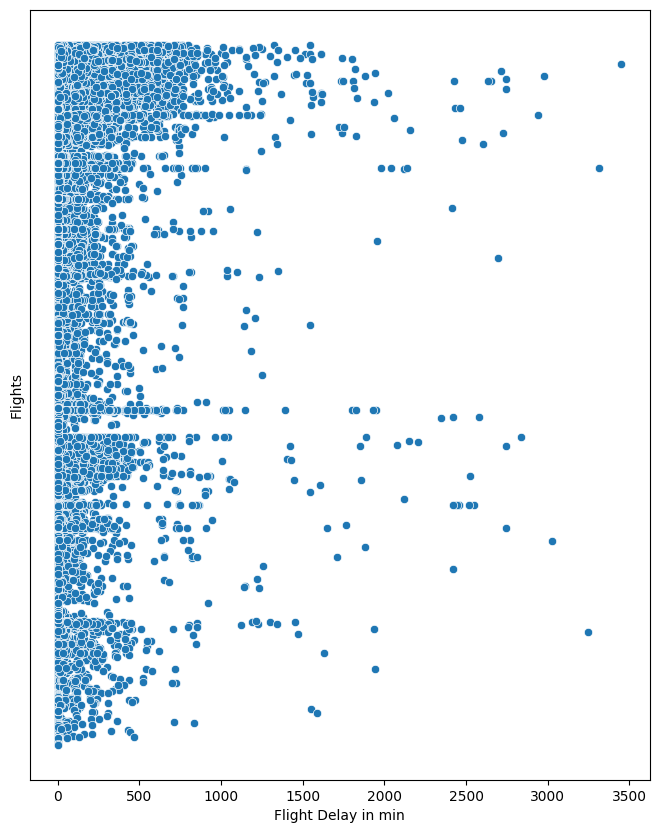

In [806]:
# Plot delays by flight number
plt.figure(figsize=(8, 10))
sns.scatterplot(y=df['FLTID'],x=df['target'], hue=None)

plt.yticks([])
plt.xlabel('Flight Delay in min')
plt.ylabel('Flights')

Text(0, 0.5, 'Airplanes (68)')

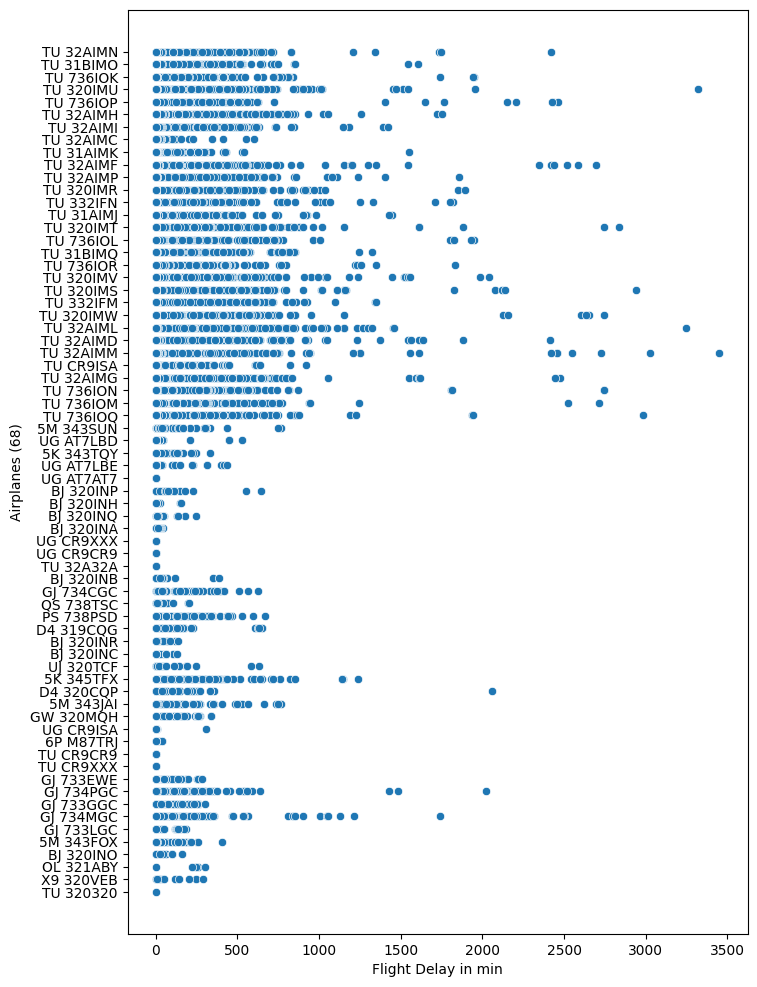

In [767]:
# Plot delays by flight number
plt.figure(figsize=(8, 12))
sns.scatterplot(y=df['AC'],x=df['target'])

plt.xlabel('Flight Delay in min')
plt.ylabel(f'Airplanes ({nr_of_airplanes})')

# Data cleaning and feature engineering

In [810]:
df.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0


In [813]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

In [814]:
X.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU


In [815]:
y

0         260.0
1          20.0
2           0.0
3           0.0
4          22.0
          ...  
107828      0.0
107829      0.0
107830      0.0
107831      0.0
107832      0.0
Name: target, Length: 107833, dtype: float64

## Splitting data for testing 

In [816]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [817]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86266 entries, 30962 to 15795
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      86266 non-null  object        
 1   DATOP   86266 non-null  datetime64[ns]
 2   FLTID   86266 non-null  object        
 3   DEPSTN  86266 non-null  object        
 4   ARRSTN  86266 non-null  object        
 5   STD     86266 non-null  datetime64[ns]
 6   STA     86266 non-null  datetime64[ns]
 7   STATUS  86266 non-null  object        
 8   AC      86266 non-null  object        
dtypes: datetime64[ns](3), object(6)
memory usage: 6.6+ MB


In [818]:
X_train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
30962,train_id_30962,2016-11-10,UG 0047,GAF,GAE,2016-11-10 15:25:00,2016-11-10 16:00:00,SCH,UG AT7AT7
34625,train_id_34625,2017-06-24,TU 0999,NCE,TUN,2017-06-24 16:35:00,2017-06-24 18:05:00,ATA,TU 320IMS
76736,train_id_76736,2018-06-03,TU 0791,LHR,TUN,2018-06-03 16:55:00,2018-06-03 19:55:00,ATA,TU 32AIMD
52580,train_id_52580,2017-08-18,TU 0299,LED,MIR,2017-08-18 00:35:00,2017-08-18 05:10:00,ATA,TU 320IMU
97130,train_id_97130,2018-12-09,TU 0852,TUN,FCO,2018-12-09 15:00:00,2018-12-09 16:25:00,ATA,TU 31BIMQ


In [819]:
# Make date columns numeric

X_train['dep_year'] = X_train['STD'].dt.year
X_train['dep_month'] = X_train['STD'].dt.month
X_train['dep_day'] = X_train['STD'].dt.day
X_train['dep_day_of_week'] = X_train['STD'].dt.dayofweek  # Monday=0, Sunday=6
X_train.drop('STD', axis=1, inplace=True)

X_train['arr_year'] = X_train['STA'].dt.year
X_train['arr_month'] = X_train['STA'].dt.month
X_train['arr_day'] = X_train['STA'].dt.day
X_train['arr_day_of_week'] = X_train['STA'].dt.dayofweek  # Monday=0, Sunday=6
X_train.drop('STA', axis=1, inplace=True)

In [820]:
X_train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,dep_year,dep_month,dep_day,dep_day_of_week,arr_year,arr_month,arr_day,arr_day_of_week
30962,train_id_30962,2016-11-10,UG 0047,GAF,GAE,SCH,UG AT7AT7,2016,11,10,3,2016,11,10,3
34625,train_id_34625,2017-06-24,TU 0999,NCE,TUN,ATA,TU 320IMS,2017,6,24,5,2017,6,24,5
76736,train_id_76736,2018-06-03,TU 0791,LHR,TUN,ATA,TU 32AIMD,2018,6,3,6,2018,6,3,6
52580,train_id_52580,2017-08-18,TU 0299,LED,MIR,ATA,TU 320IMU,2017,8,18,4,2017,8,18,4
97130,train_id_97130,2018-12-09,TU 0852,TUN,FCO,ATA,TU 31BIMQ,2018,12,9,6,2018,12,9,6


In [821]:
# Make FLTID and AC numeric

# Perform one-hot encoding for both columns
one_hot_encoded1 = pd.get_dummies(X_train['FLTID'], prefix='FLTID', dtype=int)
# one_hot_encoded2 = pd.get_dummies(X_train['AC'], prefix='AC', dtype=int) ----- User it for FLTID only at first.

# Concatenate the one-hot encoded columns with the original DataFrame
X_train = pd.concat([X_train, one_hot_encoded1], axis=1)

# Drop the original categorical columns if needed
X_train.drop(['FLTID', 'AC'], axis=1, inplace=True)


In [822]:
X_train.head()

,ID,DATOP,DEPSTN,ARRSTN,STATUS,dep_year,dep_month,dep_day,dep_day_of_week,arr_year,...,FLTID_UG 1922,FLTID_UG 1924,FLTID_UG 1925,FLTID_UG 9000,FLTID_UG 9003,FLTID_UG 9005,FLTID_UG 9006,FLTID_UH 1758,FLTID_WKL 0000,FLTID_X9 9002
30962,train_id_30962,2016-11-10,GAF,GAE,SCH,2016,11,10,3,2016,...,0,0,0,0,0,0,0,0,0,0
34625,train_id_34625,2017-06-24,NCE,TUN,ATA,2017,6,24,5,2017,...,0,0,0,0,0,0,0,0,0,0
76736,train_id_76736,2018-06-03,LHR,TUN,ATA,2018,6,3,6,2018,...,0,0,0,0,0,0,0,0,0,0
52580,train_id_52580,2017-08-18,LED,MIR,ATA,2017,8,18,4,2017,...,0,0,0,0,0,0,0,0,0,0
97130,train_id_97130,2018-12-09,TUN,FCO,ATA,2018,12,9,6,2018,...,0,0,0,0,0,0,0,0,0,0


In [823]:
X_train.drop(['DATOP','DEPSTN','ARRSTN','STATUS','ID'], axis=1, inplace=True)

In [824]:
X_train.head()

,dep_year,dep_month,dep_day,dep_day_of_week,arr_year,arr_month,arr_day,arr_day_of_week,FLTID_12Y 0000,FLTID_20M 0000,...,FLTID_UG 1922,FLTID_UG 1924,FLTID_UG 1925,FLTID_UG 9000,FLTID_UG 9003,FLTID_UG 9005,FLTID_UG 9006,FLTID_UH 1758,FLTID_WKL 0000,FLTID_X9 9002
30962,2016,11,10,3,2016,11,10,3,0,0,...,0,0,0,0,0,0,0,0,0,0
34625,2017,6,24,5,2017,6,24,5,0,0,...,0,0,0,0,0,0,0,0,0,0
76736,2018,6,3,6,2018,6,3,6,0,0,...,0,0,0,0,0,0,0,0,0,0
52580,2017,8,18,4,2017,8,18,4,0,0,...,0,0,0,0,0,0,0,0,0,0
97130,2018,12,9,6,2018,12,9,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [828]:
y = y
X = X_train

In [830]:
X.head()

,dep_year,dep_month,dep_day,dep_day_of_week,arr_year,arr_month,arr_day,arr_day_of_week,FLTID_12Y 0000,FLTID_20M 0000,...,FLTID_UG 1922,FLTID_UG 1924,FLTID_UG 1925,FLTID_UG 9000,FLTID_UG 9003,FLTID_UG 9005,FLTID_UG 9006,FLTID_UH 1758,FLTID_WKL 0000,FLTID_X9 9002
30962,2016,11,10,3,2016,11,10,3,0,0,...,0,0,0,0,0,0,0,0,0,0
34625,2017,6,24,5,2017,6,24,5,0,0,...,0,0,0,0,0,0,0,0,0,0
76736,2018,6,3,6,2018,6,3,6,0,0,...,0,0,0,0,0,0,0,0,0,0
52580,2017,8,18,4,2017,8,18,4,0,0,...,0,0,0,0,0,0,0,0,0,0
97130,2018,12,9,6,2018,12,9,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [831]:
y

0         260.0
1          20.0
2           0.0
3           0.0
4          22.0
          ...  
107828      0.0
107829      0.0
107830      0.0
107831      0.0
107832      0.0
Name: target, Length: 107833, dtype: float64

In [832]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86266 entries, 30962 to 15795
Columns: 1740 entries, dep_year to FLTID_X9 9002
dtypes: int32(8), int64(1732)
memory usage: 1.1 GB


In [782]:
# #dropping Quakers column and unnamed
# #changing one of the altitude to log and droping the original
# X_train["altitude_mean_log"] = np.log(X_train["altitude_mean_meters"])
# X_train.drop(['altitude_mean_meters'], axis=1, inplace=True)
# X_train.drop(['Quakers'], axis=1, inplace=True)
# X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [783]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86266 entries, 30962 to 15795
Columns: 1863 entries, STD to FLTID_X9 9002 
dtypes: datetime64[ns](2), int64(1861)
memory usage: 1.2 GB


In [784]:
# altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
# altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
# altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [785]:
# # fillna with mean.. 
# X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
# X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
# X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [786]:
# print(f"altitude low meters mean is {altitude_low_meters_mean}")
# print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
# print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

## Training the model

In [837]:
#training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
reg = model.fit(X_train, y_train)

In [840]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f'The MSE is {mse}.')

rmse = np.sqrt(mse)
print(f'The RMSE is {rmse}.')

The MSE is 11707.753429789087.
The RMSE is 108.20237257005545.


In [843]:
# y_test_pred = reg.predict(X_test)
# mse = mean_squared_error(y_test, y_test_pred)
# # print(mse)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AC
- ARRSTN
- DATOP
- DEPSTN
- FLTID
- ...
Feature names seen at fit time, yet now missing:
- FLTID_12Y 0000
- FLTID_20M 0000
- FLTID_6YE 0000
- FLTID_A 0000
- FLTID_AOG 0000
- ...
